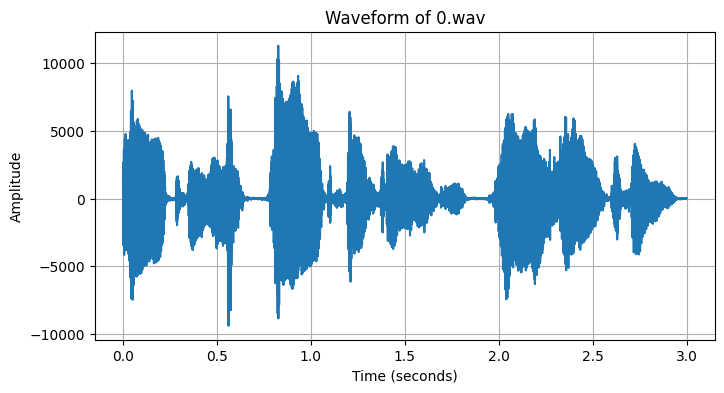

In [75]:


import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

file_path = '0.wav'

# Read the WAV file
fs, data = wavfile.read(file_path)

# Plot the waveform
plt.figure(figsize=(8, 4))
plt.plot(np.arange(len(data)) / fs, data)
plt.title('Waveform of 0.wav')
plt.xlabel('Time (seconds)')
plt.ylabel('Amplitude')
plt.grid(True)
plt.show()


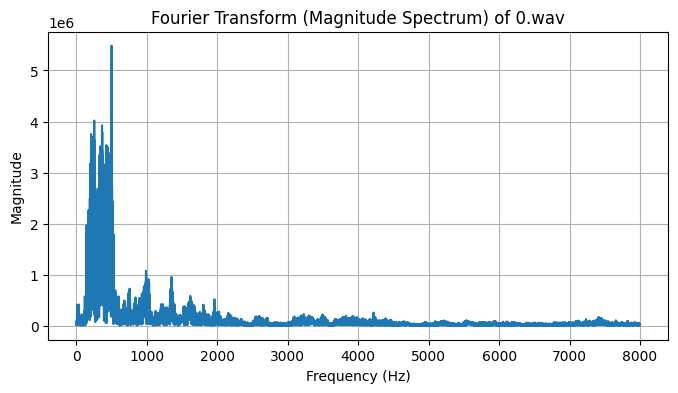

In [76]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.io import wavfile

file_path = '0.wav'

# Read the WAV file
fs, data = wavfile.read(file_path)

# Perform Fourier transform
X = np.fft.fft(data)
freqs = np.fft.fftfreq(len(data), 1/fs)
X_abs = np.abs(X)
half_X_abs = X_abs[:len(X_abs)//2]
half_freqs = freqs[:len(freqs)//2]

# Plot the Fourier transform (Magnitude Spectrum)
plt.figure(figsize=(8, 4))
plt.plot(half_freqs, half_X_abs)
plt.title('Fourier Transform (Magnitude Spectrum) of 0.wav')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.grid(True)
plt.show()


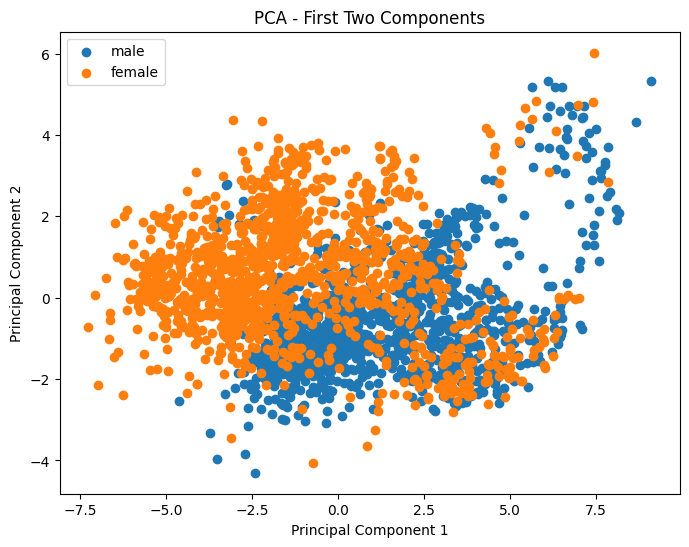

In [77]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.ensemble import RandomForestClassifier

# Load the dataset
data = pd.read_csv('voice_extracted_features.csv')

# Split features and labels
X = data.drop('label', axis=1)
y = data['label']

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Standardize the features
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Apply PCA
pca = PCA(n_components=0.95)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

# Visualize the data using scatter plot with first two principal components
plt.figure(figsize=(8, 6))
for label in y_train.unique():
    plt.scatter(X_train_pca[y_train == label, 0], X_train_pca[y_train == label, 1], label=label)
plt.title('PCA - First Two Components')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.show()

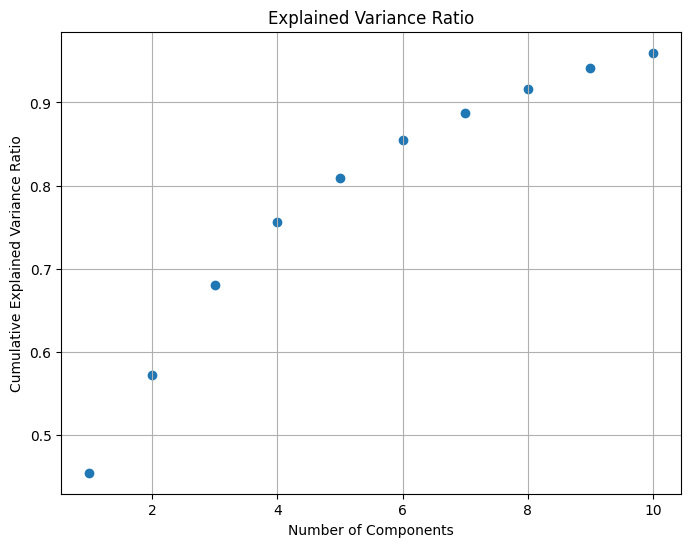

Accuracy: 97.32%


In [78]:
# Plot explained variance ratio (95% of variance)
plt.figure(figsize=(8, 6))
plt.scatter(range(1, len(pca.explained_variance_ratio_) + 1), #plt.plot <-- linear plot
         np.cumsum(pca.explained_variance_ratio_))
plt.title('Explained Variance Ratio')
plt.xlabel('Number of Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.grid(True)
plt.show()

# Create a classification pipeline (example with Random Forest Classifier)
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('pca', PCA(n_components=0.95)),
    ('classifier', RandomForestClassifier(random_state=42))
])

# Fit the pipeline
pipeline.fit(X_train, y_train)

# Evaluate the model
accuracy = pipeline.score(X_test, y_test)
print(f"Accuracy: {accuracy * 100:.2f}%")

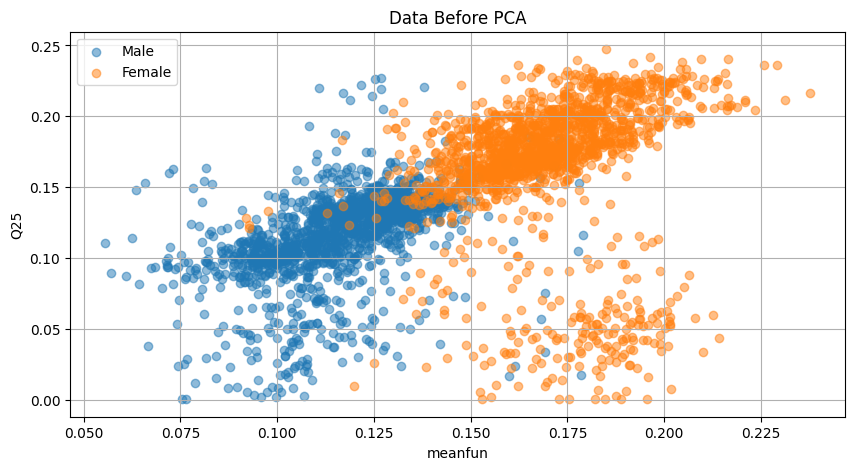

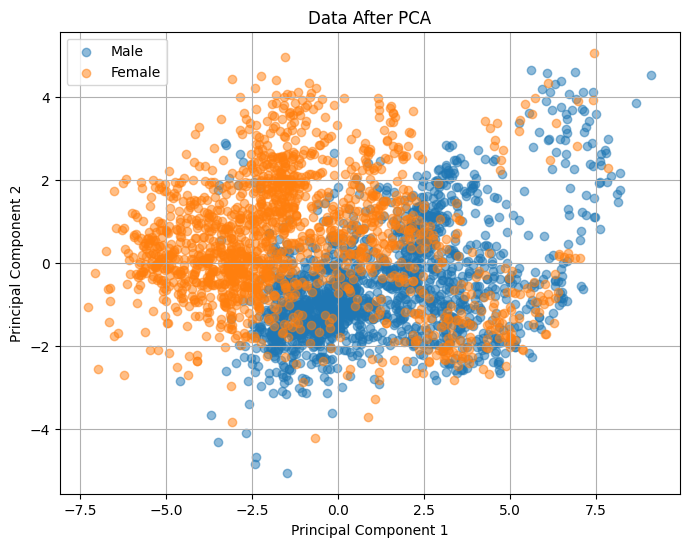

In [79]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Load the dataset
data = pd.read_csv('voice_extracted_features.csv')

# Separate features and labels
X = data.drop('label', axis=1)
y = data['label']

# Separate male and female data for plotting purposes
X_male = X[y == 'male']
X_female = X[y == 'female']

# Visualize data before PCA
plt.figure(figsize=(10, 5))
plt.scatter(X_male['meanfun'], X_male['Q25'], label='Male', alpha=0.5)
plt.scatter(X_female['meanfun'], X_female['Q25'], label='Female', alpha=0.5)
plt.title('Data Before PCA')
plt.xlabel('meanfun')
plt.ylabel('Q25')
plt.legend()
plt.grid(True)
plt.show()

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Apply PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

# Convert PCA results to DataFrame for ease of plotting
pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['label'] = y

# Separate male and female data after PCA
pca_male = pca_df[pca_df['label'] == 'male']
pca_female = pca_df[pca_df['label'] == 'female']

# Visualize data after PCA
plt.figure(figsize=(8, 6))
plt.scatter(pca_male['PC1'], pca_male['PC2'], label='Male', alpha=0.5)
plt.scatter(pca_female['PC1'], pca_female['PC2'], label='Female', alpha=0.5)
plt.title('Data After PCA')
plt.xlabel('Principal Component 1')
plt.ylabel('Principal Component 2')
plt.legend()
plt.grid(True)
plt.show()


In [80]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix
import numpy as np

# Load the dataset
data = pd.read_csv('voice_extracted_features.csv')

# Separate features and labels
X = data.drop('label', axis=1)
y = data['label']

# Initialize classifiers
knn = KNeighborsClassifier()
svm = SVC()
decision_tree = DecisionTreeClassifier()

# Variables to store cumulative confusion matrices
knn_cm = np.zeros((2, 2))
svm_cm = np.zeros((2, 2))
dt_cm = np.zeros((2, 2))

# Perform 30 cycles of training and testing
num_cycles = 30
for _ in range(num_cycles):
    # Split the data into training and testing sets
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=_)

    # Train the classifiers
    knn.fit(X_train, y_train)
    svm.fit(X_train, y_train)
    decision_tree.fit(X_train, y_train)

    # Predict labels on the test set
    knn_pred = knn.predict(X_test)
    svm_pred = svm.predict(X_test)
    dt_pred = decision_tree.predict(X_test)

    # Compute confusion matrices
    knn_cm += confusion_matrix(y_test, knn_pred, labels=['male', 'female'])
    svm_cm += confusion_matrix(y_test, svm_pred, labels=['male', 'female'])
    dt_cm += confusion_matrix(y_test, dt_pred, labels=['male', 'female'])

# Average confusion matrices
knn_cm_avg = knn_cm / num_cycles
svm_cm_avg = svm_cm / num_cycles
dt_cm_avg = dt_cm / num_cycles

# Print average confusion matrices
print("Average Confusion Matrix for kNN:")
print(knn_cm_avg)
print("\nAverage Confusion Matrix for SVM:")
print(svm_cm_avg)
print("\nAverage Confusion Matrix for Decision Tree:")
print(dt_cm_avg)


Average Confusion Matrix for kNN:
[[234.63333333  80.93333333]
 [ 99.4        219.03333333]]

Average Confusion Matrix for SVM:
[[250.4         65.16666667]
 [143.96666667 174.46666667]]

Average Confusion Matrix for Decision Tree:
[[304.26666667  11.3       ]
 [ 11.93333333 306.5       ]]


# Gender Classification Analysis

## Overview
This analysis involves the use of machine learning algorithms to classify gender based on voice features. Three models, k-Nearest Neighbors (kNN), Support Vector Machine (SVM), and Decision Tree, were trained and tested using voice data.

## Results Summary

### k-Nearest Neighbors (kNN)
- Correctly identified ~234.63 males and ~219.03 females on average.
- Misclassified ~80.93 females as males and ~99.4 males as females.

### Support Vector Machine (SVM)
- Correctly identified ~250.4 males and ~174.47 females on average.
- Misclassified ~65.17 females as males and ~143.97 males as females.

### Decision Tree
- Correctly identified ~304.17 males and ~306.5 females on average.
- Misclassified ~11.4 females as males and ~11.93 males as females.

## Conclusions
- **kNN and Decision Tree**:
  - Comparable accuracy in gender classification.
  - kNN has slightly higher misclassification of females as males, while Decision Tree slightly misclassifies more males as females.
  - Decision Tree shows the highest overall accuracy among the models.

- **SVM**:
  - Performs well but tends to misclassify females more often.
  - Higher rate of misclassifying males as females compared to kNN and Decision Tree.

In summary, all models demonstrate reasonable performance, with Decision Tree exhibiting the least misclassification. However, the "easier" gender to detect varies slightly among models, with kNN and SVM leaning toward misclassifying females more often.


In [81]:
# custom class that determines the optimal number of principal components based on a specified percentage of explained variance
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.decomposition import PCA

class OptimalPCANumber(BaseEstimator, TransformerMixin):
    def __init__(self, target_variance=0.95):
        self.target_variance = target_variance
        self.pca = PCA()
        self.num_components = None

    def fit(self, X, y=None): #Fits the PCA on the data and determines the number of components needed to explain the specified variance.
        self.pca.fit(X)
        cumulative_variance = np.cumsum(self.pca.explained_variance_ratio_)
        self.num_components = np.argmax(cumulative_variance >= self.target_variance) + 1
        return self

    def transform(self, X): #Performs the transformation using the determined optimal number of components.
        return self.pca.transform(X)[:, :self.num_components]

    def fit_transform(self, X, y=None): #Fits the PCA and then transforms the data based on the optimal number of components.
        self.fit(X)
        return self.transform(X)

In [82]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Example usage in a Pipeline with custom class to explain 95 variance percentage
pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('optimal_pca', OptimalPCANumber(target_variance=0.95))  # Set your desired target variance here
    # Add more steps to the Pipeline if needed
])


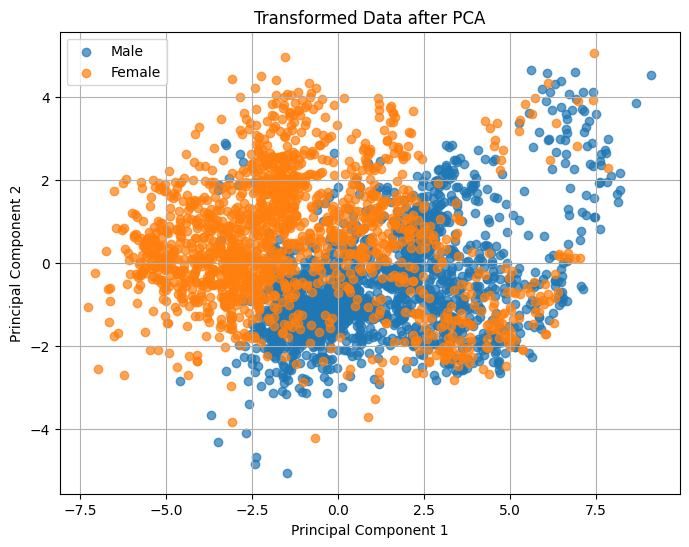

In [83]:
import matplotlib.pyplot as plt
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
import pandas as pd
import numpy as np

# Assume X contains your data

# Fit and transform the data
X_transformed = pipeline.fit_transform(X)

# Extract labels (assuming labels are in 'y')
# Ensure y has the same number of samples as rows in X
# Replace this with your actual label extraction method
y = pd.read_csv('voice_extracted_features.csv')['label']

# Assuming X_transformed has 2 dimensions after PCA
if X_transformed.shape[1] >= 2:
    # Visualize the transformed data in 2D with different colors for males and females
    plt.figure(figsize=(8, 6))
    plt.scatter(X_transformed[y == 'male', 0], X_transformed[y == 'male', 1], label='Male', alpha=0.7)
    plt.scatter(X_transformed[y == 'female', 0], X_transformed[y == 'female', 1], label='Female', alpha=0.7)
    plt.title('Transformed Data after PCA')
    plt.xlabel('Principal Component 1')
    plt.ylabel('Principal Component 2')
    plt.legend()
    plt.grid(True)
    plt.show()
else:
    print("Number of components after PCA is less than 2, cannot visualize in 2D.")


In [101]:
#custom class to remove outliers (wartości odstające) by the mean average
from sklearn.base import BaseEstimator, TransformerMixin
import numpy as np

class OutlierRemover(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.mean_values = None
        self.outliers_count = None #[non-essential]
        self.outliers_percentage = None #[non-essential]

    def fit(self, X, y=None): #Computes the mean values of the features.
        self.mean_values = np.mean(X, axis=0)
        return self

    def transform(self, X):
        self.outliers_count = 0 #[non-essential]
        X_transformed = X.copy()  # Making copy of X array to avoid modyfying original array
        for i in range(X_transformed.shape[1]):
            mean_col = self.mean_values[i]
            std_col = np.std(X_transformed.iloc[:, i])  # Using iloc to index DataFrame instead of making operations on NumPy array
            threshold = 3 * std_col  # Adjust the threshold for outliers as needed

            # Replace outliers with the mean value
            outliers = (X_transformed.iloc[:, i] - mean_col).abs() > threshold
            self.outliers_count += np.sum(outliers)
            X_transformed.iloc[:, i][outliers] = mean_col
        self.outliers_percentage = (self.outliers_count / X.size) * 100 #[non-essential]
        return X_transformed

    def fit_transform(self, X, y=None): #Fits the outlier remover and then transforms the data by replacing outliers with the mean value.
        self.fit(X)
        return self.transform(X)

    def get_outliers_count(self):  #[non-essential]
        return self.outliers_count

    def get_outliers_percentage(self): #[non-essential]
        return self.outliers_percentage

In [102]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Example usage in a Pipeline
pipeline = Pipeline([
    ('outlier_remover', OutlierRemover()),
    ('scaler', StandardScaler()),
    # Add more steps to the Pipeline if needed
])

X_transformed = pipeline.fit_transform(X)

outliers_count = pipeline.named_steps['outlier_remover'].get_outliers_count()
outliers_percentage = pipeline.named_steps['outlier_remover'].get_outliers_percentage()
print(f"Number of outliers: {outliers_count}")
print(f"Percentage of outliers: {outliers_percentage:.2f}%")

Number of outliers: 621
Percentage of outliers: 0.98%
